In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('filtered_dataset.csv')

In [ ]:
null_exists = data.isnull().any().any()

print("\nAre there any null or NaN values in the DataFrame?")
print("Yes" if null_exists else "No")


Are there any null or NaN values in the DataFrame?
No


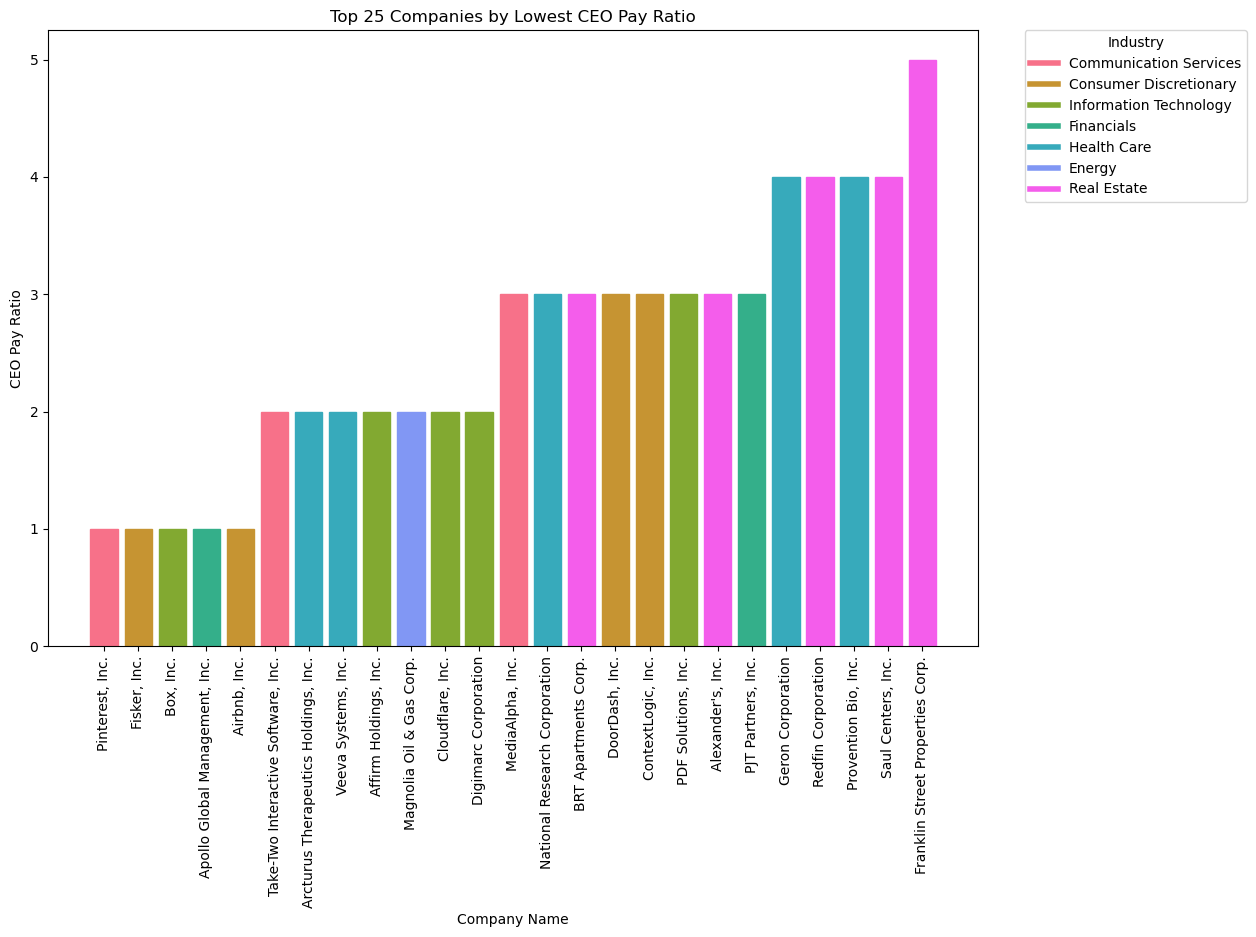

In [ ]:
# Top 10 Companies in Each Industry by Lowest Pay Ratio
sorted_data = data.sort_values('CEO_Pay_to_$1', ascending=True)

# Select the top 25 companies with the lowest ratio
top_25 = sorted_data.head(25)

# Create a bar chart with bars on the x-axis
plt.figure(figsize=(12, 8))
bar_chart = plt.bar(top_25['company_name'], top_25['CEO_Pay_to_$1'], color='blue')

# Group the companies by industry
industries = top_25['industry'].unique()

# Choose a nicer color palette
colors = sns.color_palette("husl", len(industries))
industry_color_map = {industry: colors[i % len(colors)] for i, industry in enumerate(industries)}

for i in range(len(top_25)):
    bar_chart[i].set_color(industry_color_map[top_25.iloc[i]['industry']])

# Add a legend
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=industry) for industry, color in industry_color_map.items()]
plt.legend(handles=legend_elements, title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('CEO Pay Ratio')
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.title('Top 25 Companies by Lowest CEO Pay Ratio')

# Display the chart
plt.show()





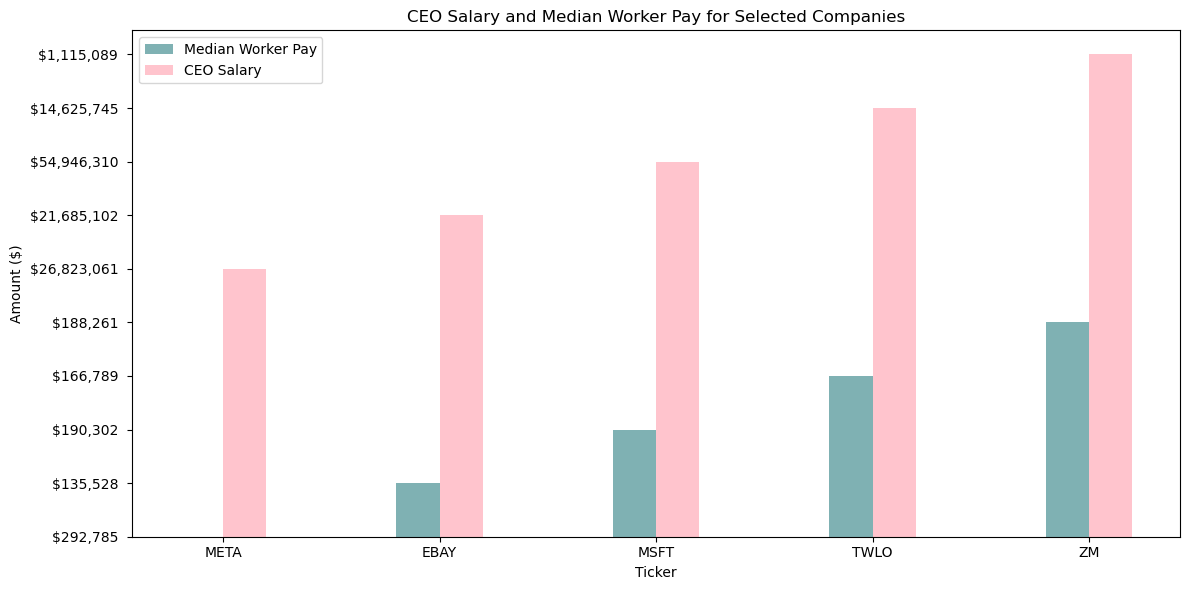

In [ ]:
 #ceo salary of companies that had recent layoffs and compare them to the average salary of a worker

selected_tickers = ['MSFT', 'EBAY', 'ZM', 'TWLO', 'META']
filtered_data = data[data['ticker'].isin(selected_tickers)]

# Define colors for the bars
bar_color1 = '#5f9ea0' # turquoise
bar_color2 = '#ffb6c1' # pink

# Create a bar chart to display the salary and median worker pay for each company
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
opacity = 0.8

index = np.arange(len(filtered_data))

rects1 = ax.bar(index, filtered_data['median_worker_pay'], bar_width, alpha=opacity, color=bar_color1, label='Median Worker Pay')
rects2 = ax.bar(index + bar_width, filtered_data['salary'], bar_width, alpha=opacity, color=bar_color2, label='CEO Salary')

ax.set_xlabel('Ticker')
ax.set_ylabel('Amount ($)')
ax.set_title('CEO Salary and Median Worker Pay for Selected Companies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(filtered_data['ticker'])
ax.legend()

fig.tight_layout()
plt.show()




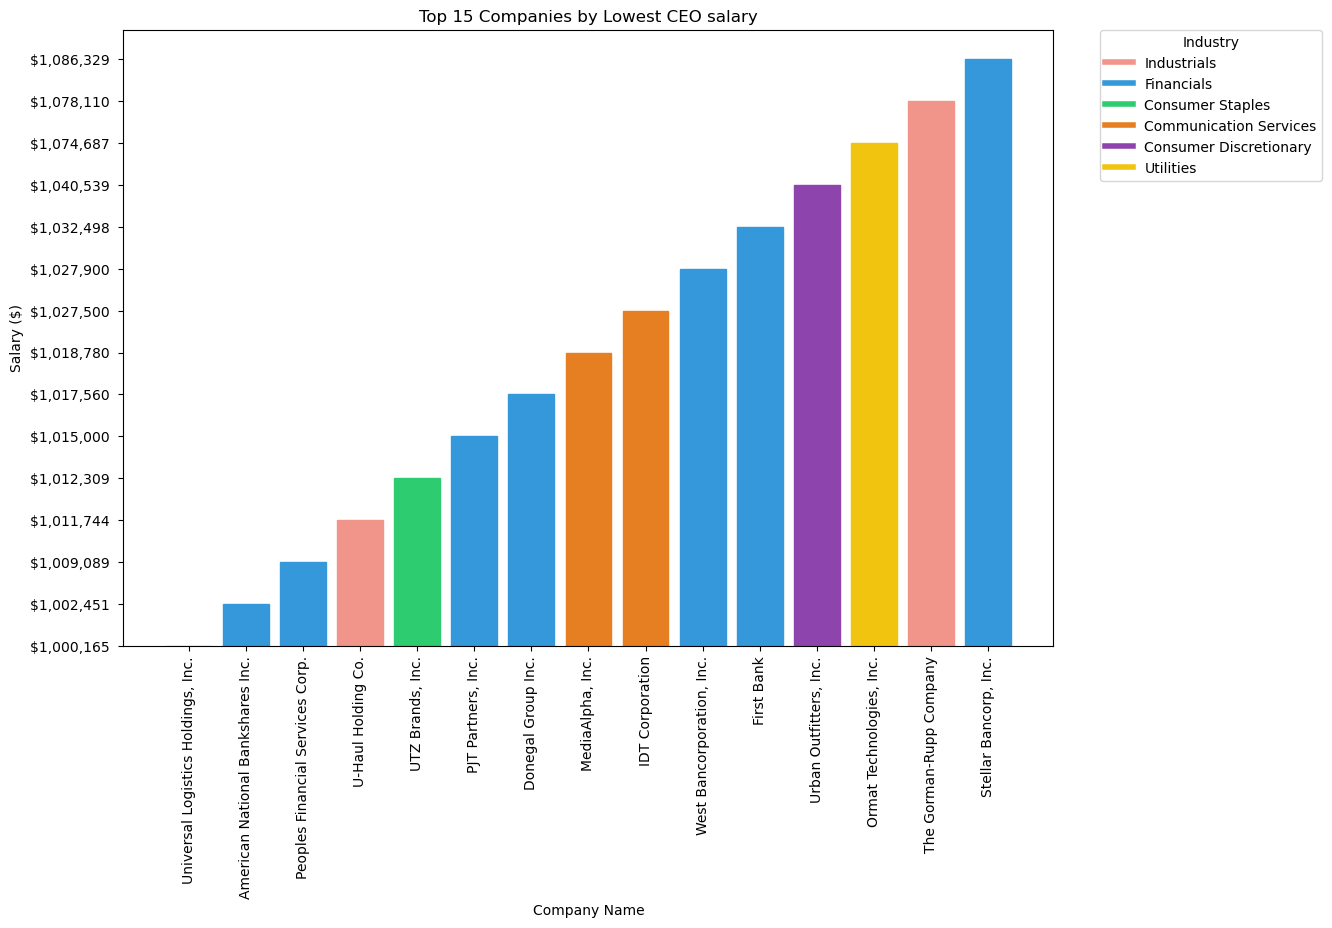

In [ ]:
#Top 15 Companies in Each Industry by Lowest CEO Salary Pay

sorted_data = data.sort_values('salary', ascending=True)

# Select the top 25 companies with the lowest ratio
top_25 = sorted_data.head(15)

# Create a bar chart with bars on the x-axis
plt.figure(figsize=(12, 8))
bar_chart = plt.bar(top_25['company_name'], top_25['salary'], color='turquoise')

# Group the companies by industry
industries = top_25['industry'].unique()
colors = ['#f1948a', '#3498db', '#2ecc71', '#e67e22', '#8e44ad', '#f1c40f', '#34495e']
industry_color_map = {industry: colors[i % len(colors)] for i, industry in enumerate(industries)}

for i in range(len(top_25)):
    bar_chart[i].set_color(industry_color_map[top_25.iloc[i]['industry']])

# Add a legend
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=industry) for industry, color in industry_color_map.items()]
plt.legend(handles=legend_elements, title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.ylabel('Salary ($)')
plt.xlabel('Company Name')
plt.xticks(rotation=90)
plt.title('Top 15 Companies by Lowest CEO salary')

# Display the chart
plt.show()
